In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from process import process_thai
from visualize import top_feats_all, plot_top_feats

In [2]:
# #snippet to install thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib
# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

In [3]:
import pandas as pd
all_df = pd.read_csv('all_df.csv')
all_df.head()

,category,texts
0,neu,10 ประโยชน์ของฮับมะกอก เกรด A จากตุรกี 1. ช่วย...
1,neg,ขับอัลติส1.8/141ม้า บางทีเจอกะบะกะพริบไฟใร่ตาม...
2,neu,อยู่แบบนี้กันไปนานๆนะ อยู่เป็นเพื่อนในเหงา อยู...
3,neu,ข้างหลังเลียนแบบ mg3ชัดชัด
4,neu,",, อยาก ชีวิตดีกับ BLEND285 จัง เลยจ๊ะพี่จ๋า"


In [4]:
#transformation
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df['texts'])
# cnt = CountVectorizer(tokenizer=process_thai, ngram_range=(1,2))
# cnt_fit = cnt.fit(all_df['texts'])
text_all = tfidf_fit.transform(all_df['texts']) #cnt_fit.transform(all_df['texts'])

#for exploration
text_all_np = text_all.toarray()
y = all_df['category']
features = tfidf_fit.get_feature_names()

In [5]:
%time ts = top_feats_all(text_all_np,y,features)
print(ts[0].shape)
ts[0].head()

CPU times: user 953 ms, sys: 1.89 s, total: 2.84 s
Wall time: 3 s
(6382, 5)


,rank,feature,score,ngram,label
0,0,,0.044832,1,neg
1,1,ไม่,0.023822,1,neg
2,2,กิน,0.021127,1,neg
3,3,xxrep,0.019947,1,neg
4,4,เลย,0.016046,1,neg


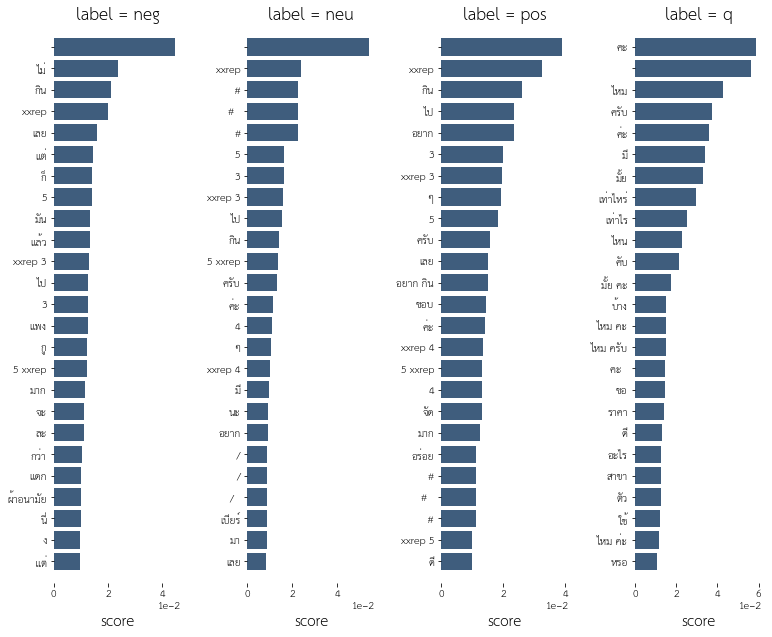

CPU times: user 1.41 s, sys: 797 ms, total: 2.2 s
Wall time: 1.12 s


In [6]:
%time plot_top_feats(ts)